### Importing the Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [53]:
data=pd.read_csv('water_potability.csv')

In [54]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
1,8.783168,218.032840,16183.586649,7.390474,334.053885,389.021616,16.354520,47.100982,4.274137,0
2,6.630364,186.761088,30939.023214,7.703481,NaN,330.876083,13.815757,86.753117,3.490588,0
3,7.793915,164.958947,25506.912237,7.868036,358.259200,398.460312,15.297496,NaN,4.220028,1
4,4.187491,208.374188,21809.709834,5.846112,327.474203,264.508083,11.235144,46.682597,4.592959,1
5,7.260320,194.247742,8127.071254,6.674032,394.555835,312.349017,16.005022,65.023960,4.282315,0
6,NaN,186.365549,7557.021271,9.454207,406.038068,288.368713,12.861417,72.187015,4.116263,1
7,8.179890,258.901939,17291.618256,5.184410,NaN,434.504238,12.813028,51.095711,4.295738,0
8,7.539882,185.825975,21575.245221,7.442999,333.079630,444.116633,15.830565,49.067977,4.531594,0
9,6.582500,200.733107,23720.481730,8.565832,353.008115,458.362733,13.001881,79.529338,4.152014,0


In [55]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10199.000000,12000.000000,12000.000000,12000.000000,9217.000000,12000.000000,12000.000000,11380.000000,12000.000000,12000.000000
mean,7.074924,197.095333,22093.683138,7.087575,333.313790,425.426020,14.320332,66.571017,3.970301,0.393583
std,1.594244,32.718028,8955.128031,1.561615,41.728097,79.478573,3.324996,16.015370,0.779703,0.488565
min,0.000000,73.492234,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.080993,177.319603,15431.963857,6.072638,306.495369,365.687520,12.092416,56.409708,3.443385,0.000000
50%,7.031684,197.602125,21065.663658,7.079462,333.148318,422.039495,14.244720,66.697224,3.957012,0.000000
75%,8.043889,217.736669,27418.781044,8.090624,359.710517,479.758924,16.563167,77.360985,4.501588,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [56]:
data.isnull().sum()

ph                 1801
Hardness              0
Solids                0
Chloramines           0
Sulfate            2783
Conductivity          0
Organic_carbon        0
Trihalomethanes     620
Turbidity             0
Potability            0
dtype: int64

### Dealing with the Null Values

In [57]:
data['ph'] = data['ph'].fillna(data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())

In [58]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Distribution of Potable vs Non-Potable Water

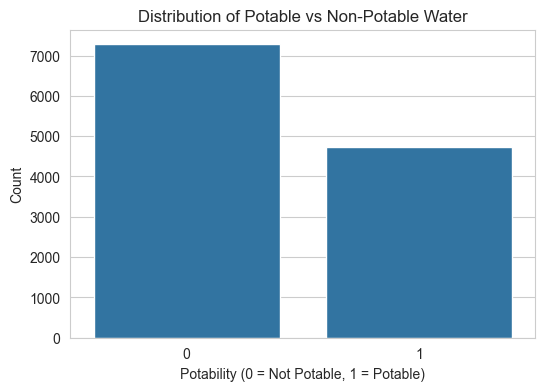

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class balance
potability_counts = data['Potability'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=potability_counts.index, y=potability_counts.values)
plt.title('Distribution of Potable vs Non-Potable Water')
plt.xlabel('Potability (0 = Not Potable, 1 = Potable)')
plt.ylabel('Count')
plt.show()

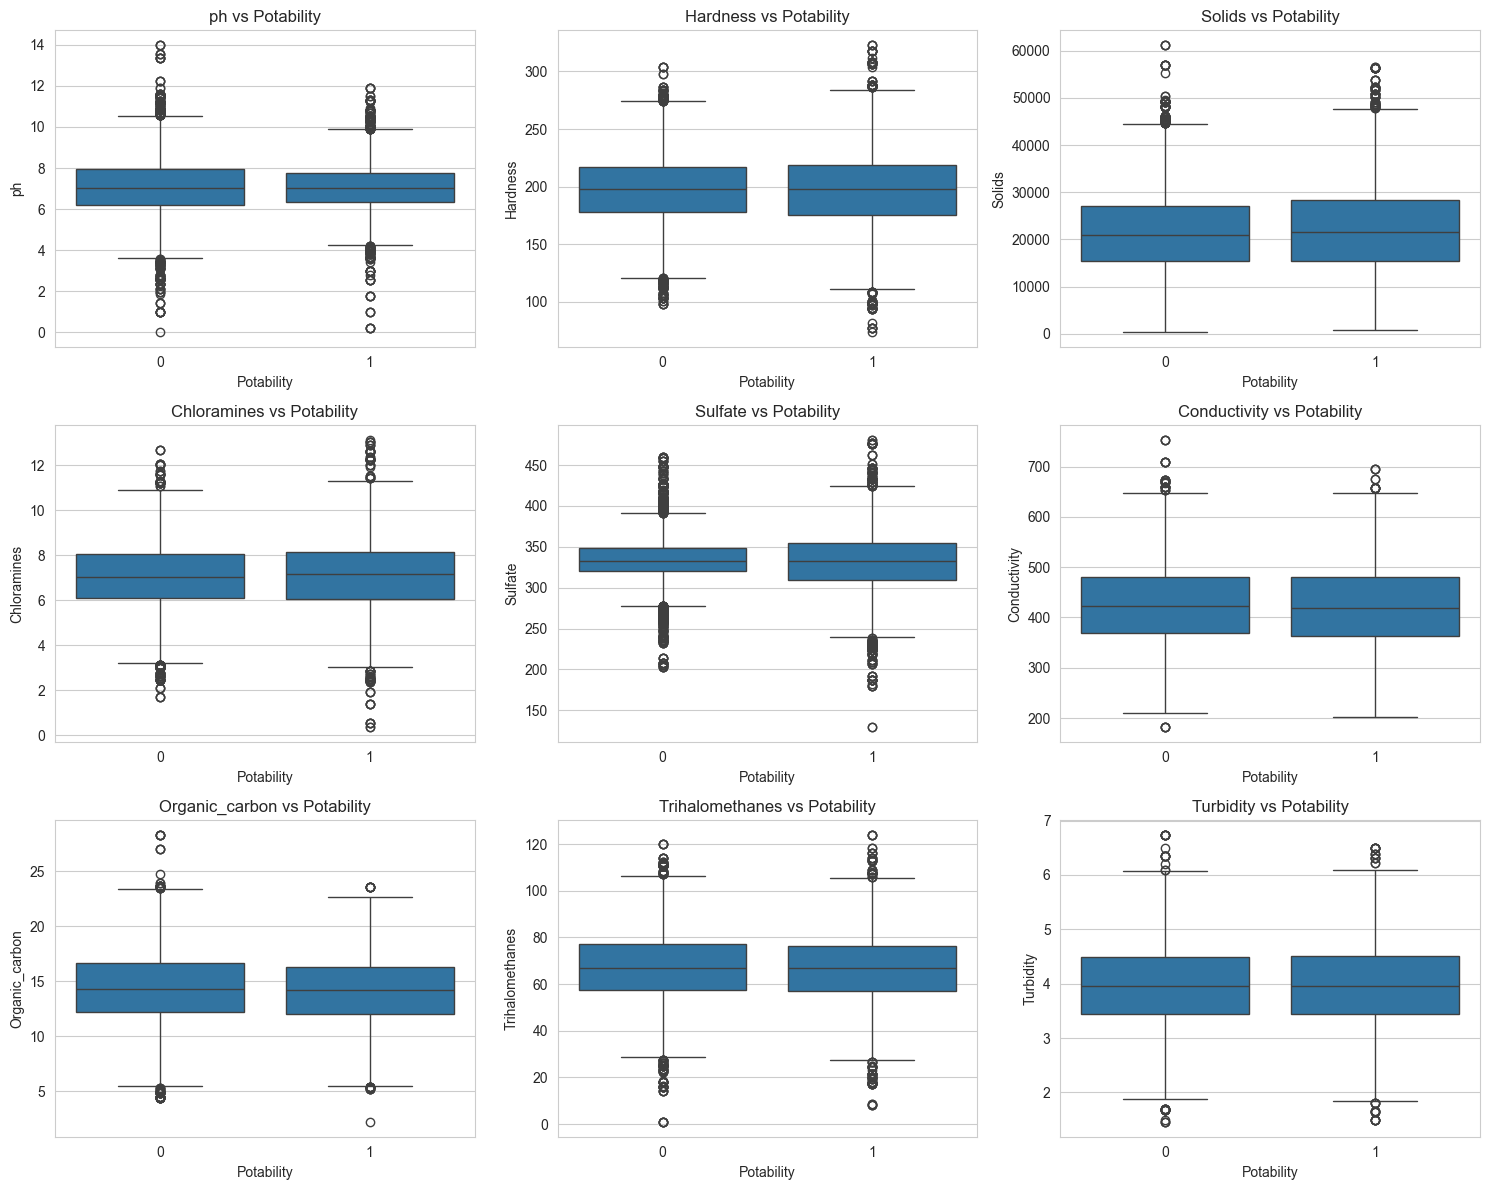

In [60]:
features = data.columns[:-1]  
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Potability', y=feature, data=data)
    plt.title(f'{feature} vs Potability')
plt.tight_layout()
plt.show()

### Correlation Heatmap

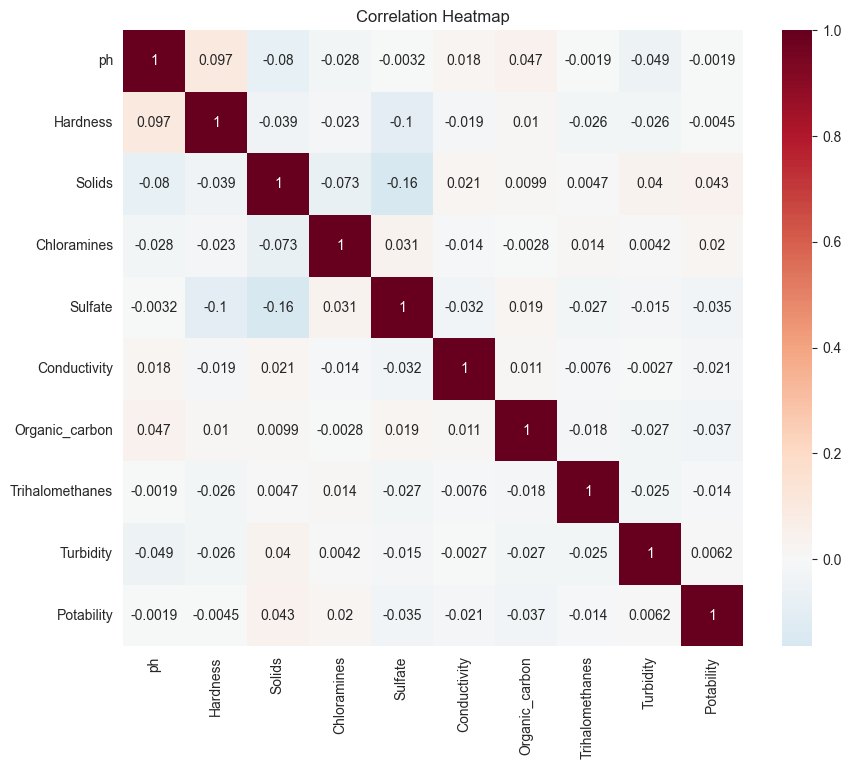

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [62]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Random Forest Algorithm

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Split data
X = data.drop('Potability', axis=1)
y = data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Foresta
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Model performance
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
print(classification_report(y_test, y_pred))

Accuracy: 98.08 %
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1466
           1       0.99      0.96      0.97       934

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



### Feature Importance for the Random Forest

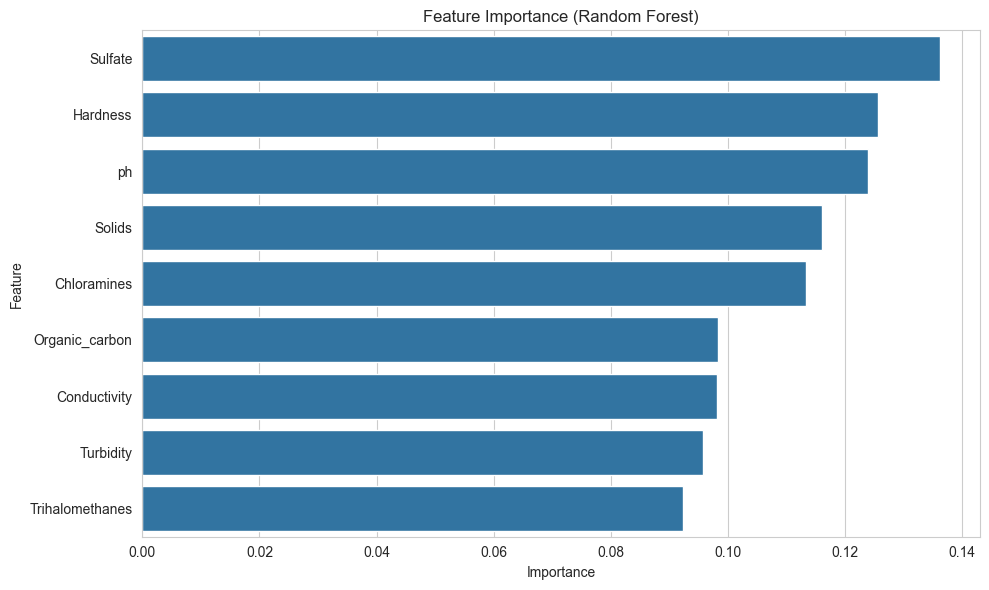

In [64]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

### Logistic Regression Algorithm

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
print(classification_report(y_test, y_pred))

coef = lr_model.coef_[0]
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': abs(coef)})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

Accuracy: 61.25 %
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1466
           1       1.00      0.00      0.01       934

    accuracy                           0.61      2400
   macro avg       0.81      0.50      0.38      2400
weighted avg       0.76      0.61      0.47      2400



### Feature Importance for Logistic Regression

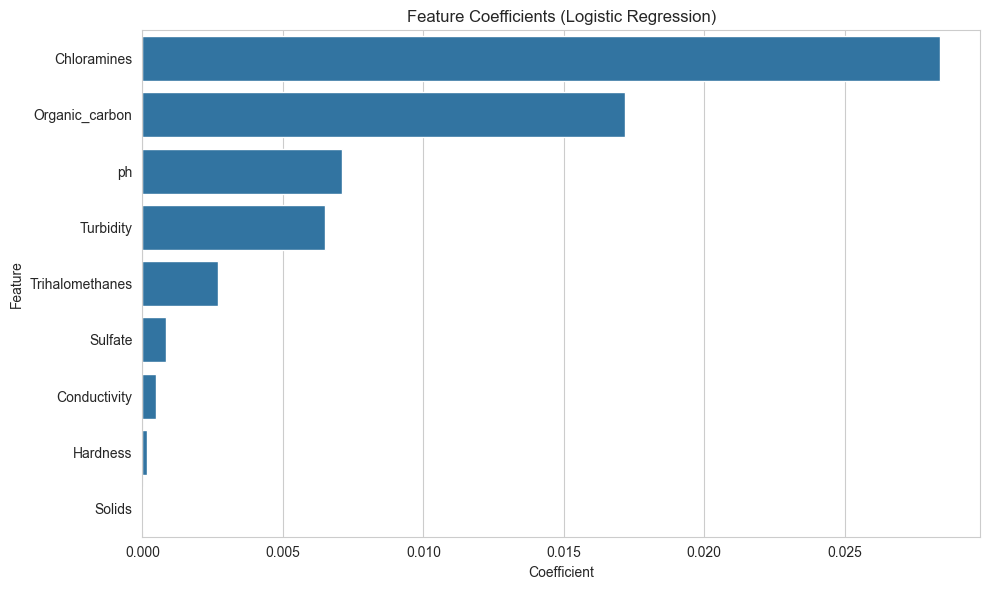

In [66]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()

### Support Vector Machine Algorithm

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
print(classification_report(y_test, y_pred))

Accuracy: 61.21 %
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1466
           1       0.62      0.01      0.02       934

    accuracy                           0.61      2400
   macro avg       0.61      0.50      0.39      2400
weighted avg       0.61      0.61      0.47      2400



### K-Nearest Neighbor Algorithm

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
print(classification_report(y_test, y_pred))

Accuracy: 82.58 %
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1466
           1       0.79      0.75      0.77       934

    accuracy                           0.83      2400
   macro avg       0.82      0.81      0.82      2400
weighted avg       0.82      0.83      0.82      2400



### Decision Tree Algorithm

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
print(classification_report(y_test, y_pred))

Accuracy: 98.04 %
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1466
           1       0.98      0.97      0.97       934

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.98      0.98      0.98      2400



### Feature Importance for Decision Tree

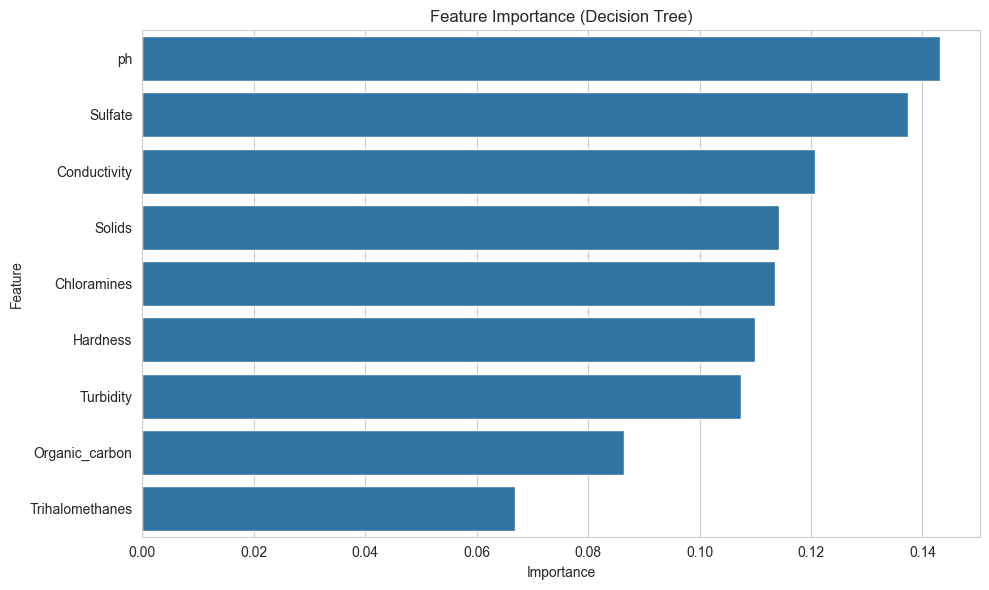

In [70]:
importances = dt_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Decision Tree)')
plt.tight_layout()
plt.show()

### Gradient Boosting Algorithm

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
print(classification_report(y_test, y_pred))

Accuracy: 73.33 %
              precision    recall  f1-score   support

           0       0.71      0.96      0.82      1466
           1       0.87      0.37      0.52       934

    accuracy                           0.73      2400
   macro avg       0.79      0.67      0.67      2400
weighted avg       0.77      0.73      0.70      2400



### Feature Importance for Gradient Boosting

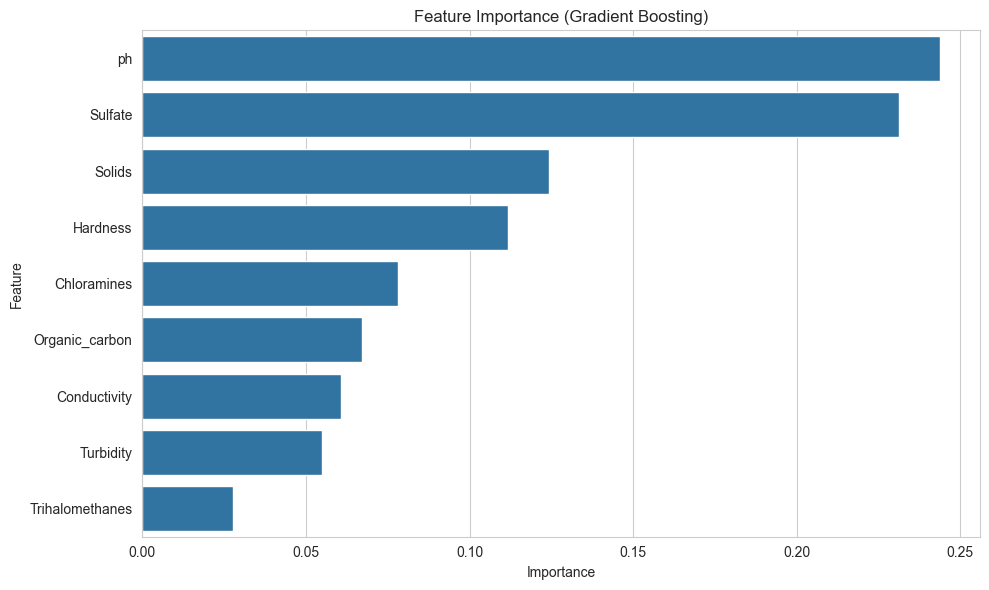

In [72]:
importances = gb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Gradient Boosting)')
plt.tight_layout()
plt.show()

In [73]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
import shap
print(shap.__version__)

0.47.2


### SHAP (SHapley Additive explanations)

##### It calculates how much each feature contributes to your rf_model's predictions. Essentially, it breaks down individual predictions to show which factors push the outcome up or down. The plots then summarize these individual contributions across all predictions, revealing the most impactful features for the model's overall behavior.

SHAP output type: <class 'numpy.ndarray'>
SHAP values shape: (2400, 9, 2)


<Figure size 640x480 with 0 Axes>

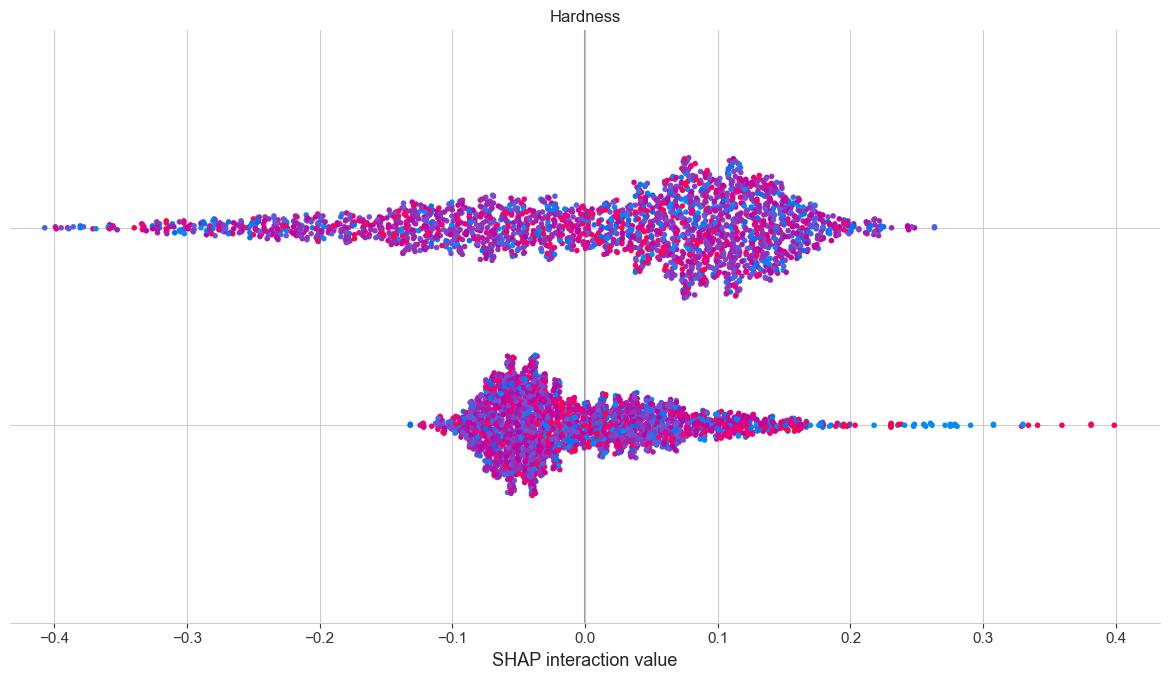

<Figure size 640x480 with 0 Axes>

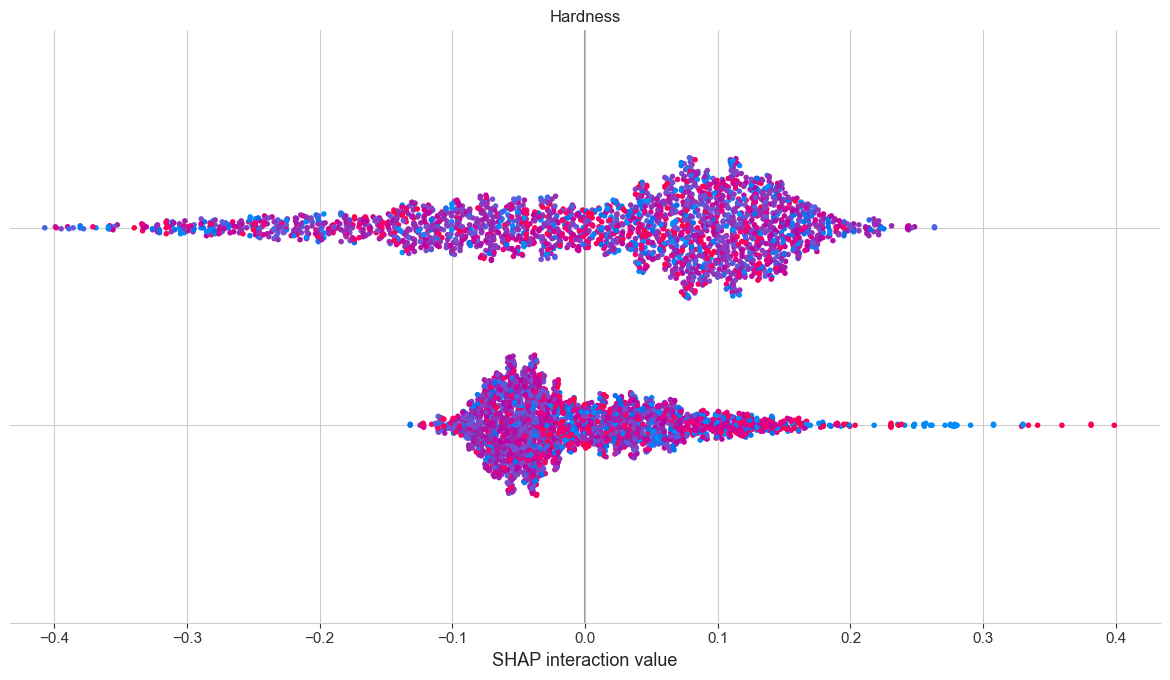

In [75]:
import shap

# Initialize the TreeExplainer
explainer = shap.TreeExplainer(rf_model)

# Get SHAP values (for binary classification, it returns a list of arrays)
shap_values = explainer.shap_values(X_test)

# Check shape before using it
print(f"SHAP output type: {type(shap_values)}")

# If it's a list (one array per class), use shap_values[1] for the positive class
if isinstance(shap_values, list) and len(shap_values) == 2:
    print("SHAP values shape:", shap_values[1].shape)
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
    shap.summary_plot(shap_values[1], X_test)
else:
    # If it's a single array, just use it directly
    print("SHAP values shape:", shap_values.shape)
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

### Partial Dependence Plot (PDP)

##### It visualizes how your rf_model's prediction changes as one or two specific features (ph and Sulfate in this case) vary, while averaging out the effects of all other features. This helps you understand the direct relationship between a feature and the predicted outcome.

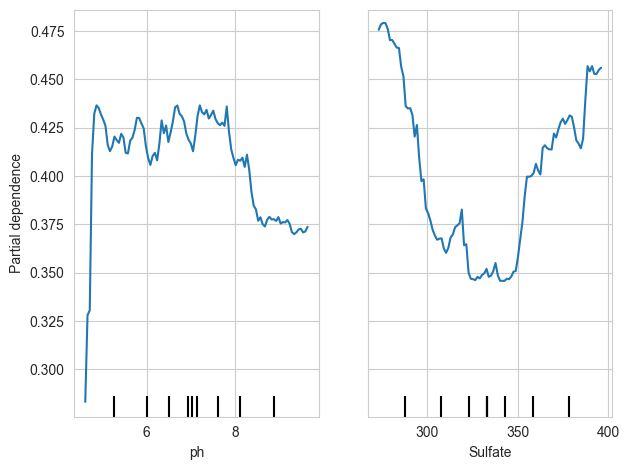

In [76]:
from sklearn.inspection import PartialDependenceDisplay

features = ['ph', 'Sulfate']
PartialDependenceDisplay.from_estimator(rf_model, X_train, features)
plt.tight_layout()
plt.show()

### What-if Analysis also known as a Single Feature Perturbation Plot

##### It explores how your rf_model's prediction for a *single water sample* changes when only its ph value is varied across a range, while all other features remain constant. This helps understand the direct impact of ph on the predicted probability of water potability for that specific sample.

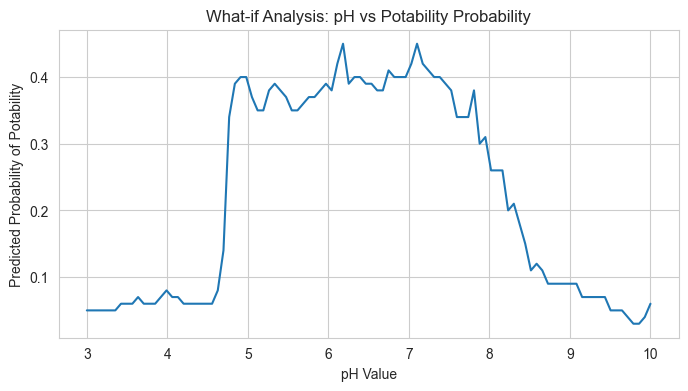

In [77]:
import numpy as np

base_sample = X_test.iloc[0].copy()
ph_range = np.linspace(3, 10, 100)
predictions = []

for val in ph_range:
    sample_copy = base_sample.copy()
    sample_copy['ph'] = val
    predictions.append(rf_model.predict_proba([sample_copy])[0][1])  # Prob of Potable

# Plot
plt.figure(figsize=(8, 4))
plt.plot(ph_range, predictions)
plt.title("What-if Analysis: pH vs Potability Probability")
plt.xlabel("pH Value")
plt.ylabel("Predicted Probability of Potability")
plt.grid(True)
plt.show()

### Scenario Comparison Plot

##### It visually compares an "Original" water sample with a "Recommended" (hypothetical) one. The bar chart highlights specific changes in water quality parameters between the two scenarios, allowing you to easily see which features are altered and by how much to achieve a desired outcome.

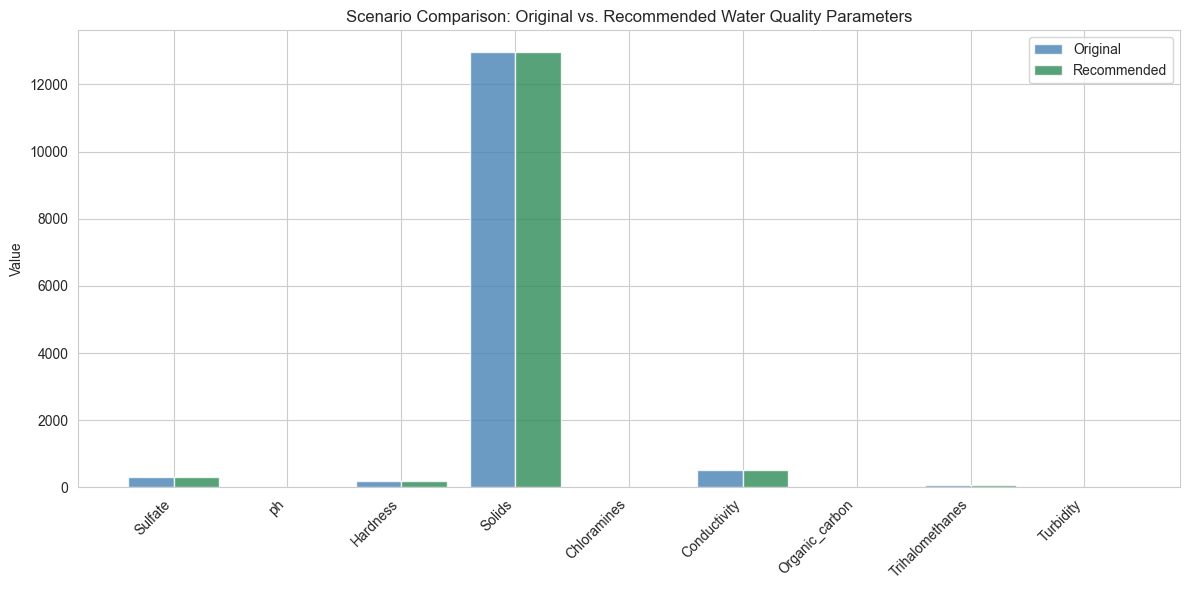

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

non_potable_idx = y_test[y_test == 0].index[0] 
original_sample = X_test.loc[non_potable_idx]


recommended_sample = original_sample.copy()
recommended_sample['ph'] = recommended_sample['ph'] + 0.5 
recommended_sample['Sulfate'] = max(0, recommended_sample['Sulfate'] - 10) 

def plot_scenario_comparison(original_sample, recommended_sample, features=None):
    if features is None:
        features = original_sample.index.tolist()
    df = pd.DataFrame({
        'Original': original_sample[features],
        'Recommended': recommended_sample[features]
    }).reset_index().rename(columns={'index': 'Feature'})
    
    df['Diff'] = np.abs(df['Recommended'] - df['Original'])
    df = df.sort_values(by='Diff', ascending=False).reset_index(drop=True)
    
    x = np.arange(len(df))
    width = 0.4
    
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    bars1 = plt.bar(x - width/2, df['Original'], width, label='Original', color='steelblue', alpha=0.8)
    bars2 = plt.bar(x + width/2, df['Recommended'], width, label='Recommended', color='seagreen', alpha=0.8)
    
    plt.xticks(x, df['Feature'], rotation=45, ha='right')
    plt.ylabel('Value')
    plt.title('Scenario Comparison: Original vs. Recommended Water Quality Parameters')
    plt.legend()
    plt.tight_layout()
    
    for i in x:
        diff = df.loc[i, 'Recommended'] - df.loc[i, 'Original']
        if abs(diff) > 0.01 * (df['Original'].max() - df['Original'].min()):
            plt.text(i, max(df.loc[i, 'Original'], df.loc[i, 'Recommended']) + 0.05 * df['Original'].max(),
                     f'{diff:+.2f}', ha='center', va='bottom', fontsize=9, color='black')
    
    plt.show()

# Plotting the comparison
plot_scenario_comparison(original_sample, recommended_sample)

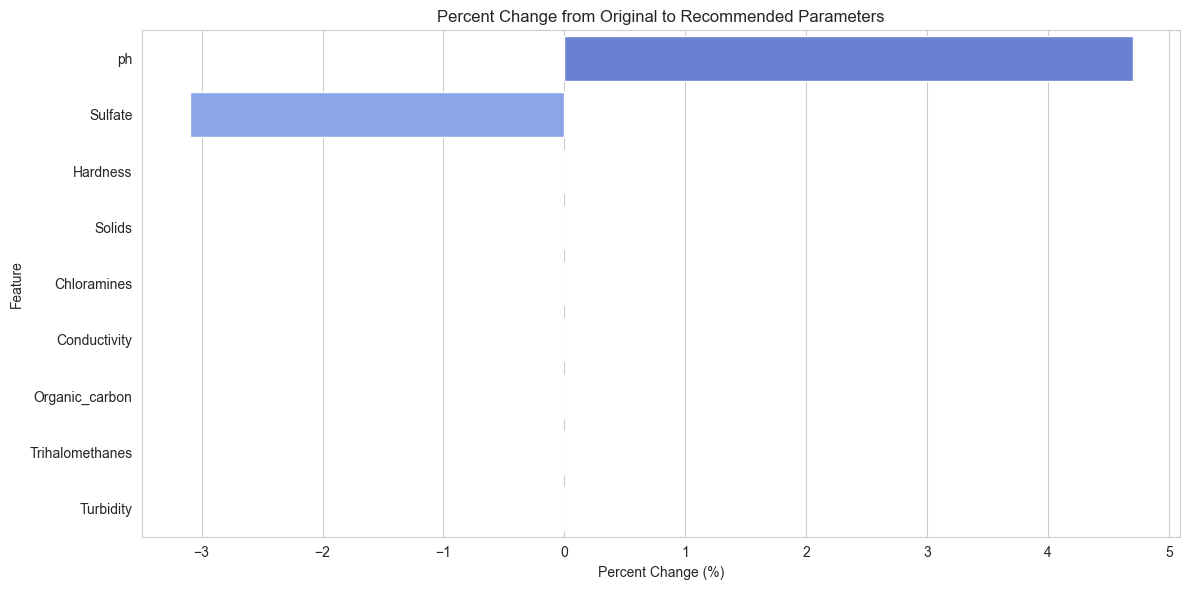

In [79]:
def plot_percent_change(original_sample, recommended_sample, features=None):
    if features is None:
        features = original_sample.index.tolist()

    df = pd.DataFrame({
        'Original': original_sample[features],
        'Recommended': recommended_sample[features]
    }).reset_index().rename(columns={'index': 'Feature'})
    
    # Calculate percent change
    df['Percent Change'] = ((df['Recommended'] - df['Original']) / df['Original'].replace(0, np.nan)) * 100
    df = df.sort_values(by='Percent Change', key=abs, ascending=False).reset_index(drop=True)

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    sns.barplot(x='Percent Change', y='Feature', data=df, palette='coolwarm', orient='h')
    plt.title('Percent Change from Original to Recommended Parameters')
    plt.xlabel('Percent Change (%)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

# Usage
plot_percent_change(original_sample, recommended_sample)

In [80]:
import plotly.graph_objects as go
import pandas as pd

def interactive_scenario_comparison(original_sample, recommended_sample, features=None):
    if features is None:
        features = original_sample.index.tolist()

    df = pd.DataFrame({
        'Feature': features,
        'Original': original_sample[features].values,
        'Recommended': recommended_sample[features].values
    })
    
    # Sort by absolute difference
    df['Diff'] = abs(df['Recommended'] - df['Original'])
    df = df.sort_values(by='Diff', ascending=False).reset_index(drop=True)
    
    fig = go.Figure(data=[
        go.Bar(name='Original', x=df['Feature'], y=df['Original'], marker_color='steelblue'),
        go.Bar(name='Recommended', x=df['Feature'], y=df['Recommended'], marker_color='seagreen')
    ])

    fig.update_layout(
        title='Interactive Scenario Comparison: Original vs Recommended',
        xaxis_title='Water Quality Parameters',
        yaxis_title='Value',
        barmode='group',
        xaxis_tickangle=-45,
        template='plotly_white',
        height=500
    )
    fig.show()

# Usage
interactive_scenario_comparison(original_sample, recommended_sample)

In [81]:
import plotly.express as px
import numpy as np
import pandas as pd

def multiple_samples_comparison(original_samples, recommended_samples, sample_ids=None, features=None):
    """
    original_samples: pd.DataFrame of multiple samples (rows = samples, cols = features)
    recommended_samples: pd.DataFrame same shape as original_samples with recommended values
    sample_ids: list of sample identifiers (optional)
    features: list of features to compare (optional)
    """

    if features is None:
        features = original_samples.columns.tolist()

    if sample_ids is None:
        sample_ids = original_samples.index.astype(str).tolist()

    records = []
    for sid, orig_row, rec_row in zip(sample_ids, original_samples[features].values, recommended_samples[features].values):
        for feat, orig_val, rec_val in zip(features, orig_row, rec_row):
            records.append({
                'Sample': sid,
                'Feature': feat,
                'Original': orig_val,
                'Recommended': rec_val
            })
    df_long = pd.DataFrame(records)
    df_melt = df_long.melt(id_vars=['Sample', 'Feature'], value_vars=['Original', 'Recommended'], 
                           var_name='Scenario', value_name='Value')

    fig = px.bar(df_melt, x='Feature', y='Value', color='Scenario', barmode='group',
                 facet_col='Sample', facet_col_wrap=2,
                 category_orders={'Scenario': ['Original', 'Recommended']},
                 title='Multiple Samples: Original vs Recommended Parameter Comparison')

    fig.update_layout(height=600 + 300 * ((len(sample_ids)+1)//2),
                      xaxis_tickangle=-45,
                      template='plotly_white')
    fig.show()

# Example Usage:
# Let's create multiple samples from test set:
sample_indices = y_test[y_test == 0].index[:4]  # first 4 non-potable samples
original_samples = X_test.loc[sample_indices]
recommended_samples = original_samples.copy()

# Simulate recommendations (for demo only)
recommended_samples['ph'] = recommended_samples['ph'] + 0.5
recommended_samples['Sulfate'] = (recommended_samples['Sulfate'] - 10).clip(lower=0)

multiple_samples_comparison(original_samples, recommended_samples)

In [82]:
importance_df

,Feature,Importance
0,ph,0.243832
4,Sulfate,0.231194
2,Solids,0.124346
1,Hardness,0.111688
3,Chloramines,0.078192
6,Organic_carbon,0.067122
5,Conductivity,0.060754
8,Turbidity,0.055040
7,Trihalomethanes,0.027831


Recommended tweaks found:
                     Original   Recommended
ph                  10.632910     11.632910
Hardness           198.378012    198.378012
Solids           12958.748457  12458.748457
Chloramines          7.135497      7.135497
Sulfate            322.623249    272.623249
Conductivity       522.027870    522.027870
Organic_carbon      16.722195     16.722195
Trihalomethanes     71.776018     71.776018
Turbidity            3.722455      3.722455


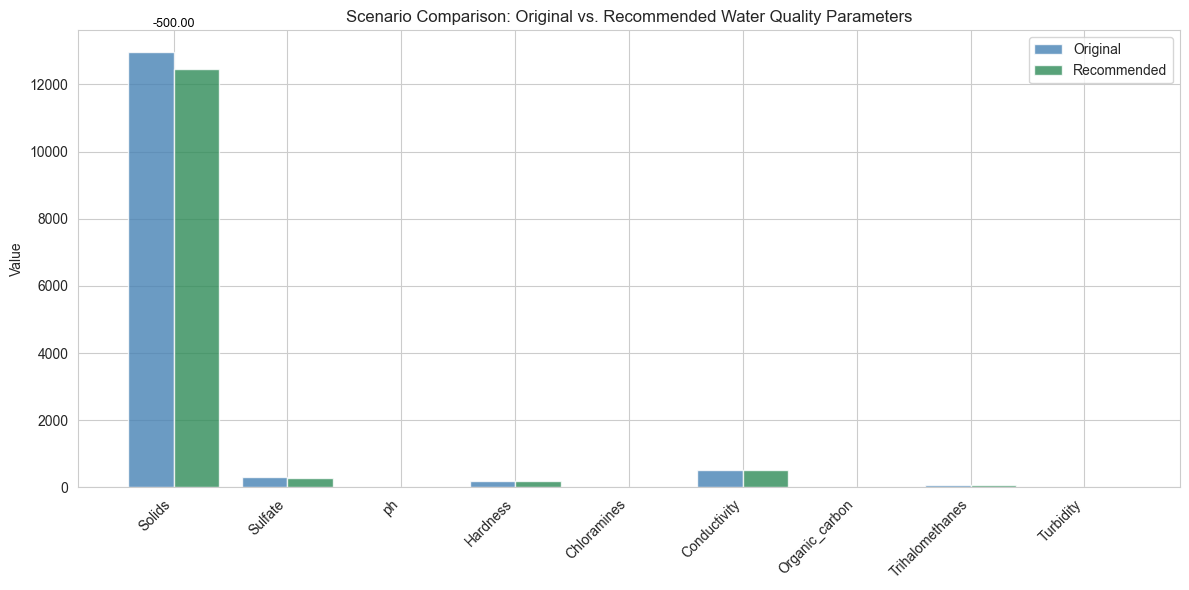

In [83]:
def recommend_adjustments(sample, model, important_features, step_sizes, max_steps=10):

    recommended = sample.copy()
    original_pred = model.predict(sample.values.reshape(1, -1))[0]
    if original_pred == 1:
        return sample  

    for step in range(1, max_steps + 1):
        for feature in important_features:
            if feature == 'ph':
                recommended[feature] = sample[feature] + step * step_sizes[feature]
            elif feature in ['Sulfate', 'Solids']:
                recommended[feature] = max(sample[feature] - step * step_sizes[feature], 0)  # avoid negative
            else:
                recommended[feature] = sample[feature]

        pred = model.predict(recommended.values.reshape(1, -1))[0]
        if pred == 1:
            return recommended

    return None  


top_features = ['ph', 'Sulfate', 'Solids']
step_sizes = {'ph': 0.1, 'Sulfate': 5, 'Solids': 50} 

sample = X_test[y_test == 0].iloc[0]

recommended_sample = recommend_adjustments(sample, rf_model, top_features, step_sizes)

if recommended_sample is not None:
    print("Recommended tweaks found:")
    print(pd.DataFrame({'Original': sample, 'Recommended': recommended_sample}))
    
    plot_scenario_comparison(sample, recommended_sample)
else:
    print("Could not find tweaks within step limits.")

In [84]:
def batch_recommend_adjustments(X_data, y_data, model, important_features, step_sizes, max_steps=10, max_samples=5):

    samples = X_data[y_data == 0].copy()
    results = []

    for i, (_, sample) in enumerate(samples.iterrows()):
        if i >= max_samples:
            break
        recommended = recommend_adjustments(sample, model, important_features, step_sizes, max_steps)
        if recommended is not None:
            combined = pd.DataFrame({
                'Feature': sample.index,
                'Original': sample.values,
                'Recommended': recommended.values
            })
            combined['Sample_ID'] = i + 1
            results.append(combined)

    return pd.concat(results)

# Usage
batch_results = batch_recommend_adjustments(X_test, y_test, rf_model, top_features, step_sizes, max_steps=10, max_samples=5)

In [85]:
def plot_batch_scenario_comparison(batch_df, max_height=900):
    n_samples = batch_df['Sample_ID'].nunique()
    height_per_sample = 300  
    
    total_height = min(height_per_sample * n_samples, max_height)

    fig = px.bar(
        batch_df,
        x='Feature',
        y=['Original', 'Recommended'],
        barmode='group',
        facet_col='Sample_ID',
        category_orders={"Feature": top_features},
        title='Original vs Recommended Water Quality Parameters Across Samples'
    )
    fig.update_layout(height=total_height, showlegend=True)
    fig.show()

# Call with your batch_results dataframe
plot_batch_scenario_comparison(batch_results)

In [86]:
summary = batch_results.groupby('Feature').apply(
    lambda df: (df['Recommended'] - df['Original']).mean()
).reset_index(name='Avg_Change')

print(summary)

           Feature  Avg_Change
0      Chloramines       0.000
1     Conductivity       0.000
2         Hardness       0.000
3   Organic_carbon       0.000
4           Solids    -387.500
5          Sulfate     -38.750
6  Trihalomethanes       0.000
7        Turbidity       0.000
8               ph       0.775


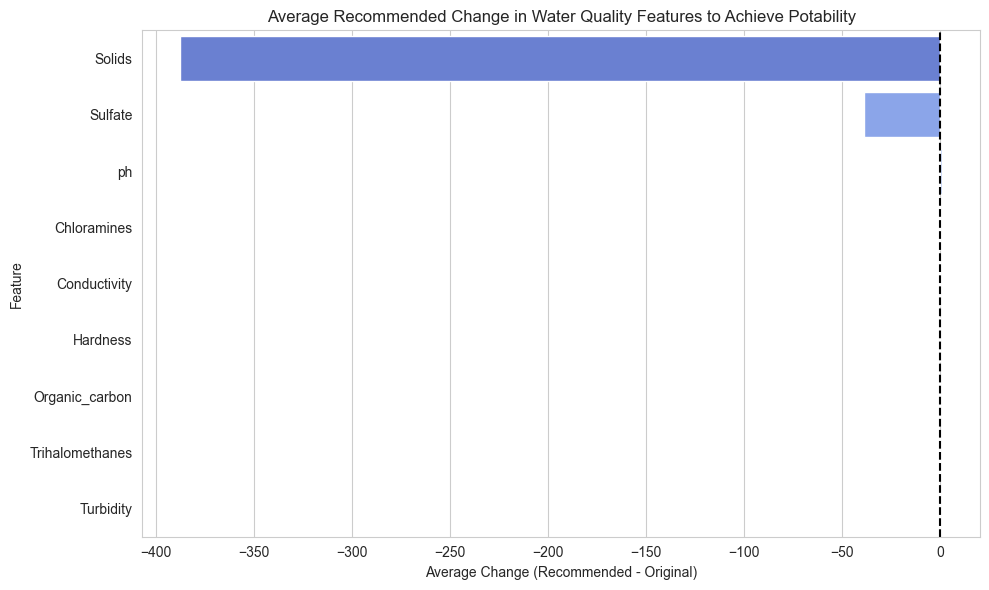

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by magnitude of average change
summary['Abs_Avg_Change'] = summary['Avg_Change'].abs()
summary_sorted = summary.sort_values(by='Abs_Avg_Change', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Avg_Change', y='Feature', data=summary_sorted, palette='coolwarm')
plt.title('Average Recommended Change in Water Quality Features to Achieve Potability')
plt.xlabel('Average Change (Recommended - Original)')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [88]:
mean_originals = batch_results.groupby('Feature')['Original'].mean().reset_index()
percent_change = pd.merge(summary, mean_originals, on='Feature')
percent_change['Percent_Change'] = (percent_change['Avg_Change'] / percent_change['Original']) * 100

percent_change_sorted = percent_change.reindex(percent_change.Percent_Change.abs().sort_values(ascending=False).index)

print(percent_change_sorted[['Feature', 'Percent_Change']])

           Feature  Percent_Change
5          Sulfate      -11.952058
8               ph        9.509356
4           Solids       -1.792634
0      Chloramines        0.000000
1     Conductivity        0.000000
2         Hardness        0.000000
3   Organic_carbon        0.000000
6  Trihalomethanes        0.000000
7        Turbidity        0.000000


In [89]:
top_features_to_tweak = percent_change_sorted.head(3)

summary_text = "Key Features Requiring Adjustment to Improve Water Potability:\n"
for _, row in top_features_to_tweak.iterrows():
    summary_text += f"- {row['Feature']}: approx {row['Percent_Change']:.1f}% change recommended\n"

print(summary_text)

Key Features Requiring Adjustment to Improve Water Potability:
- Sulfate: approx -12.0% change recommended
- ph: approx 9.5% change recommended
- Solids: approx -1.8% change recommended



### Principal Component Analysis Algorithm

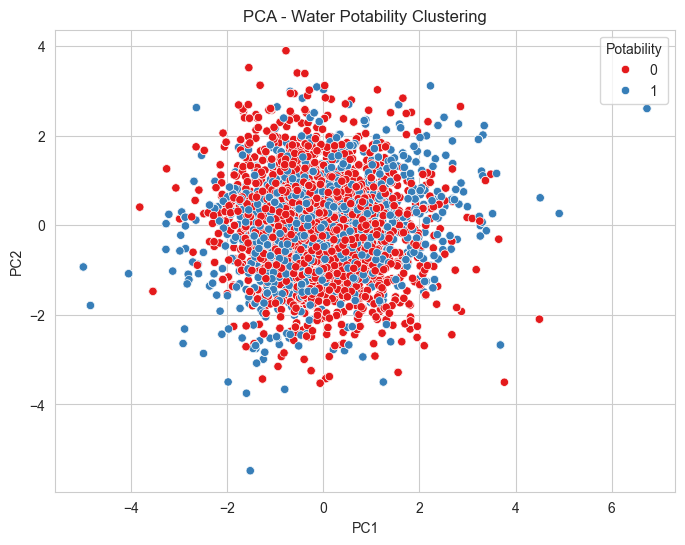

In [90]:
from sklearn.decomposition import PCA
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(data.drop('Potability', axis=1))

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Add to DataFrame
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Potability"] = data["Potability"]

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", hue="Potability", data=pca_df, palette="Set1")
plt.title("PCA - Water Potability Clustering")
plt.show()

In [91]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### XGBoost Classifier Algorithm

In [92]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data.drop("Potability", axis=1)
y = data["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 97.21%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1466
           1       0.98      0.95      0.96       934

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



### Hierarchical Clustering

##### It groups water quality features based on their similarity, showing which features behave alike. The dendrogram visually represents these groupings and their relationships, allowing you to identify natural clusters among the different water quality parameters.

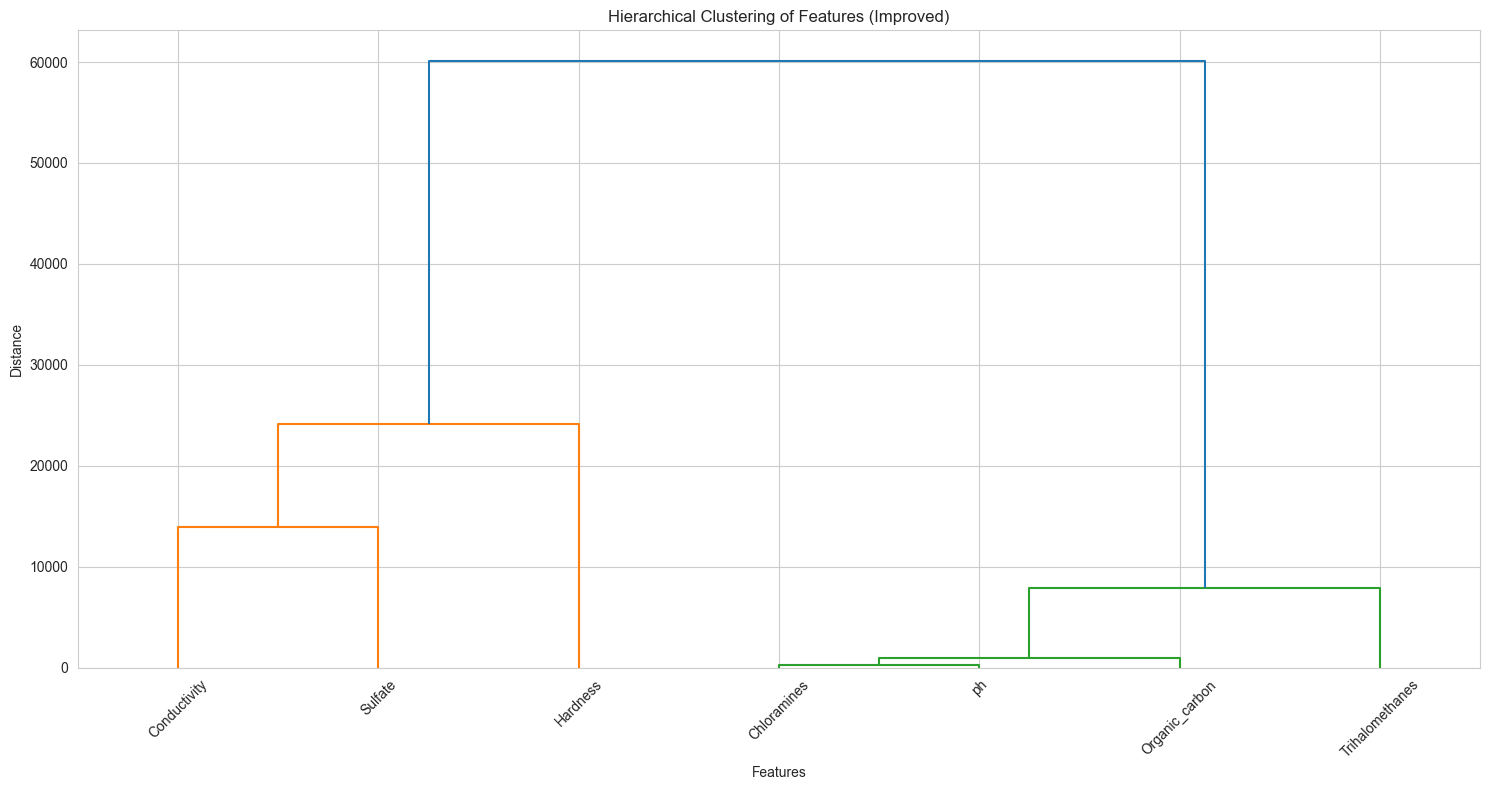

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

features_for_clustering = data.drop(["Potability", "Turbidity", "Solids"], axis=1)

linked = linkage(features_for_clustering.T, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(
    linked,
    orientation='top',
    labels=features_for_clustering.columns.tolist(),
    distance_sort='descending',
    show_leaf_counts=True,
    leaf_rotation=45,
    leaf_font_size=10,
)
plt.title("Hierarchical Clustering of Features (Improved)")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

### ROC Curve (Receiver Operating Characteristic Curve) Comparison

##### It visualizes and compares the performance of two different classification models (Random Forest and Logistic Regression). The ROC curve shows how well each model distinguishes between potable and non-potable water, with the Area Under the Curve (AUC) providing a summary measure of their overall predictive ability.

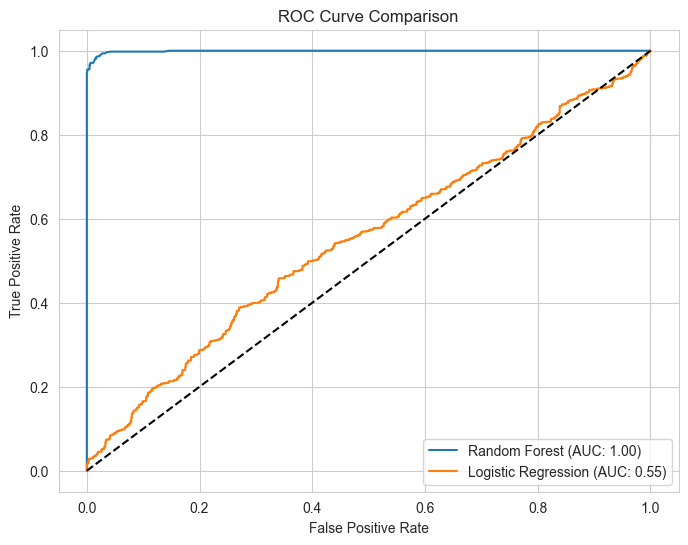

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000)

rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

rf_probs = rf.predict_proba(X_test)[:,1]
lr_probs = lr.predict_proba(X_test)[:,1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC: {auc(rf_fpr, rf_tpr):.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC: {auc(lr_fpr, lr_tpr):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Custom Feature Engineering and Model Retraining

##### It creates a new feature called sulfate_ph_interaction based on a specific rule (high Sulfate and low pH). Then, it retrains the Random Forest model using this new feature and evaluates if it improves the model's accuracy, showing how domain knowledge can enhance predictions.

In [95]:
# Example Rule: If Sulfate is high and pH is low → Potential Issue
data["sulfate_ph_interaction"] = (data["Sulfate"] > 300).astype(int) & (data["ph"] < 6.5).astype(int)

# Retrain Model with new feature
X_new = data.drop("Potability", axis=1)
y = data["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("New Feature Model Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

New Feature Model Accuracy: 98.42%


### Stratified K-Fold Cross-Validation

##### It rigorously evaluates your `RandomForestClassifier` by training and testing it multiple times on different portions of your data (5 folds). Crucially, it ensures each training/testing split maintains the original proportion of potable and non-potable water, providing a more reliable assessment of your model's accuracy and F1-score.

In [96]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier(random_state=42)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=cv_strategy, scoring='accuracy', n_jobs=-1)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")


cv_f1_scores = cross_val_score(model, X, y, cv=cv_strategy, scoring='f1_weighted', n_jobs=-1)
print(f"Mean cross-validation F1-score (weighted): {np.mean(cv_f1_scores):.4f}")

Cross-validation scores: [0.98125    0.97875    0.98041667 0.98041667 0.98458333]
Mean cross-validation accuracy: 0.9811
Standard deviation of cross-validation accuracy: 0.0019
Mean cross-validation F1-score (weighted): 0.9810
